## PCA Sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Generate dummy data using numpy
np.random.seed(2343243)

In [3]:
mean_vec_1 = np.array([0,0,0])
cov_mat_1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec_1, cov_mat_1, 100)

In [4]:
mean_vec_2 = np.array([1,1,1])
cov_mat_2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec_2, cov_mat_2, 100)

In [5]:
from mpl_toolkits.mplot3d import Axes3D, proj3d

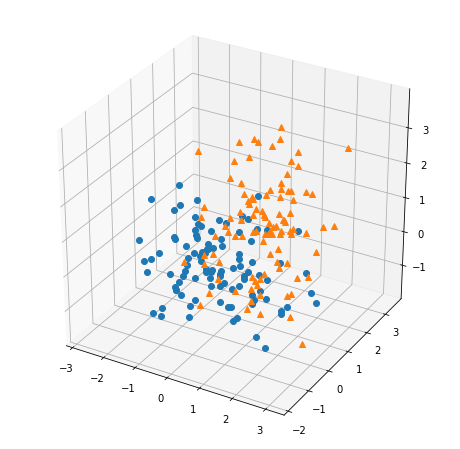

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(class1[:, 0], class1[:,1], class1[:,2], 'o')
ax.plot(class2[:, 0], class2[:,1], class2[:,2], '^')
plt.show()

In [7]:
# Move 3D to 2D
X = np.concatenate((class1, class2))

In [8]:
pca = PCA(n_components = 2)
X_transformed = pca.fit_transform(X)
X_transformed

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [9]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

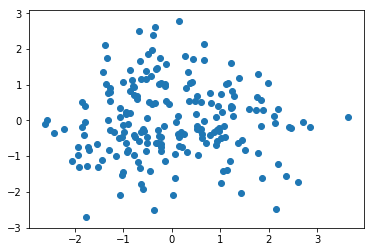

In [10]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.show()

## PCA 3D Implementation
We will implement the PCA algorithm on the 3D dataset.
This will be implemented from scratch including the process of finding the
covariance matrix, and applying SVD to find eigenvectors and eigenvalues.

In [12]:
# Original data
X.shape

(200, 3)

In [13]:
# Finding the covariance matrix
# We need to find the co-variance of one feature with another hence we take the covariance
# of the transposed matrix of the data and not the data as it is
x_t = X.T
cov = np.cov(x_t)
cov.shape # should be (f, f)

(3, 3)

In [14]:
cov

array([[1.14139998, 0.1061989 , 0.0918139 ],
       [0.1061989 , 1.11579657, 0.27166986],
       [0.0918139 , 0.27166986, 1.11826602]])

In [15]:
# Finding eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov)
eig_vals, eig_vecs

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

In [16]:
# Forming an array where each index will store the eigvalue and its corresponding eigvector
# Note : Eigen Vectors are column wise not row wise

eig_val_vec_pair = []
for i in range(len(eig_vals)):
    eig_vec = eig_vecs[:, i]
    eig_val_vec_pair.append((eig_vals[i], eig_vec))
    
eig_val_vec_pair

[(1.4518653417359286, array([0.41124564, 0.64810013, 0.64097055])),
 (1.0786611401978583, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.8449360955327045, array([ 0.0402454 , -0.71540934,  0.69754554]))]

In [18]:
# Now we sort in decreasing order
eig_val_vec_pair.sort(reverse=True)
eig_val_vec_pair

[(1.4518653417359286, array([0.41124564, 0.64810013, 0.64097055])),
 (1.0786611401978583, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.8449360955327045, array([ 0.0402454 , -0.71540934,  0.69754554]))]

In [20]:
# Now we can pick top n components according to our requirement
# inbuilt pca components
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

In [21]:
# pca eigen vals
pca.explained_variance_

array([1.45186534, 1.07866114])